# 프로젝트 1: 손수 설계하는 선형회귀, 당뇨병 수치를 맞춰보자!

## (1) 데이터 가져오기
---
- sklearn.datasets의 load_diabetes에서 데이터를 가져와주세요.
- diabetes의 data를 df_X에, target을 df_y에 저장해주세요.

In [1]:
# 사이킷런에서 데이터 불러오기
from sklearn.datasets import load_diabetes

diabetes=load_diabetes()

In [18]:
# data와 target 받아오기 및 확인
df_X=diabetes.data
df_y=diabetes.target

In [24]:
# 데이터 확인
print(df_X.shape)

(442, 10)


In [23]:
print(df_y.shape)

(442,)


In [31]:
diabetes["feature_names"]

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [27]:
df_X[0]

array([ 0.03807591,  0.05068012,  0.06169621,  0.02187235, -0.0442235 ,
       -0.03482076, -0.04340085, -0.00259226,  0.01990842, -0.01764613])

In [28]:
df_y[0]

151.0

## (2) 모델에 입력할 데이터 X 준비하기
---
- df_X에 있는 값들을 numpy array로 변환해서 저장해주세요.

In [29]:
import numpy as np

X = np.array(df_X)
X.shape

(442, 10)

## (3) 모델에 예측할 데이터 y 준비하기
---
- df_y에 있는 값들을 numpy array로 변환해서 저장해주세요.

In [30]:
y = np.array(df_y)
y.shape

(442,)

## (4) train 데이터와 test 데이터로 분리하기
---
- X와 y 데이터를 각각 train 데이터와 test 데이터로 분리해주세요.

In [79]:
from sklearn.model_selection import train_test_split

# train : test = 8:2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

len(X), len(X_train), len(X_test)

(442, 353, 89)

## (5) 모델 준비하기
---
- 입력 데이터 개수에 맞는 가중치 W와 b를 준비해주세요.
- 모델 함수를 구현해주세요.

In [65]:
W = np.random.rand(10)
b = np.random.rand()

In [102]:
def model(X, W, b):
    return np.dot(X, W) + b

## (6) 손실함수 loss 정의하기
---
- 손실함수를 MSE 함수로 정의해주세요.

In [50]:
def MSE(y, y_pred):
    mse = ((y - y_pred) ** 2).mean()
    return mse

def loss(X, W, b, y):
    y_pred = model(X, W, b)
    L = MSE(y, y_pred)
    return L

## (7) 기울기를 구하는 gradient 함수 구현하기
---
- 기울기를 계산하는 gradient 함수를 구현해주세요.

In [103]:
def gradient(X, W, b, y):
    N = len(y)
    
    y_pred = model(X, W, b)
    
    dW = 1/N * 2 * X.T.dot(y_pred - y)
    db = 2 * (y_pred - y).mean()
    return dW, db

## (8) 하이퍼파라미터인 학습률 설정하기
---
- 학습률, learning rate 를 설정해주세요
- 만약 학습이 잘 되지 않는다면 learning rate 값을 한번 여러 가지로 설정하며 실험해 보세요.

In [91]:
LEARNING_RATE = 0.01

## (9) 모델 학습하기
---
- 정의된 손실함수와 기울기 함수로 모델을 학습해주세요.
- loss값이 충분히 떨어질 때까지 학습을 진행해주세요.
- 입력하는 데이터인 X에 들어가는 특성 컬럼들을 몇 개 빼도 괜찮습니다. 다양한 데이터로 실험해 보세요.

In [120]:
losses = []
epochs = 50000

for i in range(epochs):
    dW, db = gradient(X_train, W, b, y_train)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(X_train, W, b, y_train)
    losses.append(L)
    if i % 500 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))

Iteration 0 : Loss 2928.9663
Iteration 500 : Loss 2928.9579
Iteration 1000 : Loss 2928.9495
Iteration 1500 : Loss 2928.9412
Iteration 2000 : Loss 2928.9328
Iteration 2500 : Loss 2928.9245
Iteration 3000 : Loss 2928.9161
Iteration 3500 : Loss 2928.9078
Iteration 4000 : Loss 2928.8994
Iteration 4500 : Loss 2928.8911
Iteration 5000 : Loss 2928.8828
Iteration 5500 : Loss 2928.8744
Iteration 6000 : Loss 2928.8661
Iteration 6500 : Loss 2928.8578
Iteration 7000 : Loss 2928.8495
Iteration 7500 : Loss 2928.8411
Iteration 8000 : Loss 2928.8328
Iteration 8500 : Loss 2928.8245
Iteration 9000 : Loss 2928.8162
Iteration 9500 : Loss 2928.8079
Iteration 10000 : Loss 2928.7996
Iteration 10500 : Loss 2928.7913
Iteration 11000 : Loss 2928.7830
Iteration 11500 : Loss 2928.7747
Iteration 12000 : Loss 2928.7665
Iteration 12500 : Loss 2928.7582
Iteration 13000 : Loss 2928.7499
Iteration 13500 : Loss 2928.7416
Iteration 14000 : Loss 2928.7334
Iteration 14500 : Loss 2928.7251
Iteration 15000 : Loss 2928.7168
I

## (10) test 데이터에 대한 성능 확인하기
---
- test 데이터에 대한 성능을 확인해주세요.

In [122]:
W, b

(array([  -0.93135204, -219.75731333,  513.79826781,  289.49776231,
        -144.97564849,  -72.4252683 , -171.15846872,  165.29570702,
         438.46853918,  113.39630614]),
 152.0245389640391)

In [121]:
prediction = model(X_test, W, b)
mse = loss(X_test, W, b, y_test)
mse

2733.6097160835307

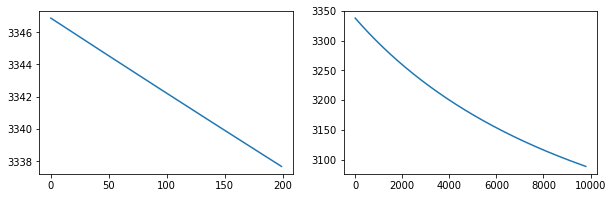

In [116]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 3))
plt.subplot(1, 2, 1)
plt.plot(losses[:200])

plt.subplot(1, 2, 2)
plt.plot(losses[200:])

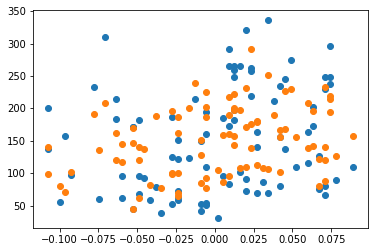

In [123]:
# prediction과 y_test 비교
plt.scatter(X_test[:, 0], y_test)
plt.scatter(X_test[:, 0], prediction)
plt.show()